<h2>Importing the libraries</h2>

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

<h2>Combining the exercise data and calories</h2>

In [3]:
path='exercise1.csv'
exercise1=pd.read_csv(path)
exercise1

,User_ID,Gender,Age,Height
0,14733363,male,68,190
1,14861698,female,20,166
2,11179863,male,69,179
3,16180408,female,34,179
4,17771927,female,27,154
...,...,...,...,...
14995,15644082,female,20,193
14996,17212577,female,27,165
14997,17271188,female,43,159
14998,18643037,male,78,193


In [4]:
path='exercise2.csv'
exercise2=pd.read_csv(path)
exercise2

,Weight,Duration,Heart_Rate,Body_Temp
0,94,29,105,40.8
1,60,14,94,40.3
2,79,5,88,38.7
3,71,13,100,40.5
4,58,10,81,39.8
...,...,...,...,...
14995,86,11,92,40.4
14996,65,6,85,39.2
14997,58,16,90,40.1
14998,97,2,84,38.3


In [5]:
path='calories.csv'
calories=pd.read_csv(path)
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [6]:
#combining data frames
combined_data=pd.concat([exercise1 , exercise2 ,calories['Calories']],axis=1)
combined_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45.0
14996,17212577,female,27,165,65,6,85,39.2,23.0
14997,17271188,female,43,159,58,16,90,40.1,75.0
14998,18643037,male,78,193,97,2,84,38.3,11.0


In [7]:
#checking the number of rows & columns
combined_data.shape

(15000, 9)

In [8]:
#getting the information about the data 
#most importantly to know about any missing values
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [9]:
#checking the missing values
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<h2>Analysing the data</h2>

In [10]:
#To get stastical measures about the data
combined_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<h2>Conversion of text data to numerical values</h2>

In [11]:
combined_data.replace({'Gender':{'male':0,'female':1}},inplace=True)
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231.0
1,14861698,1,20,166,60,14,94,40.3,66.0
2,11179863,0,69,179,79,5,88,38.7,26.0
3,16180408,1,34,179,71,13,100,40.5,71.0
4,17771927,1,27,154,58,10,81,39.8,35.0


<h2>Visualization of data</h2>

<AxesSubplot:xlabel='Gender', ylabel='count'>

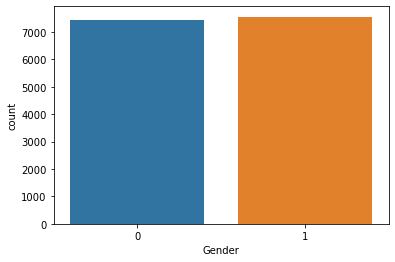

In [12]:
#plotting the gender column in count plot
sns.countplot(combined_data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

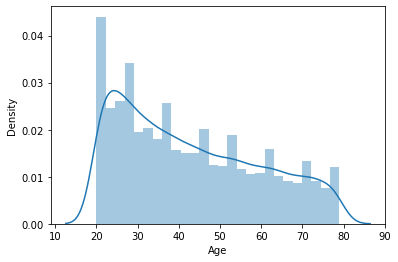

In [13]:
#inorder to find the distribution of age column
sns.distplot(combined_data['Age'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

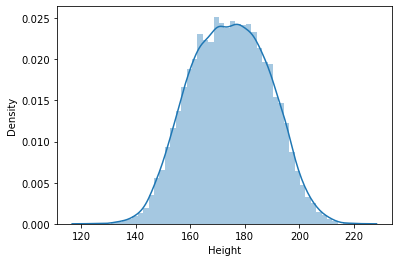

In [14]:
#inorder to find the distribution of height column
sns.distplot(combined_data['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

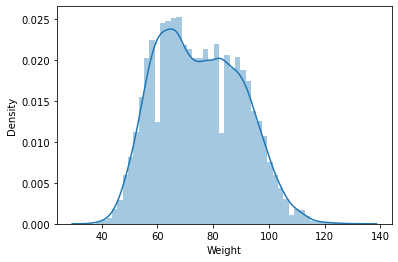

In [15]:
#inorder to find the distribution of weight column
sns.distplot(combined_data['Weight'])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

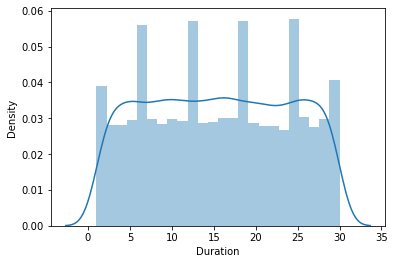

In [16]:
sns.distplot(combined_data['Duration'])

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

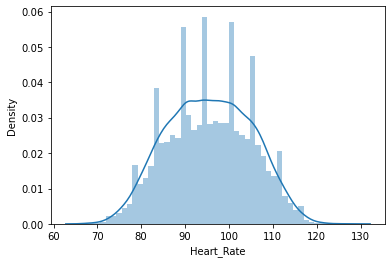

In [17]:
sns.distplot(combined_data['Heart_Rate'])


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

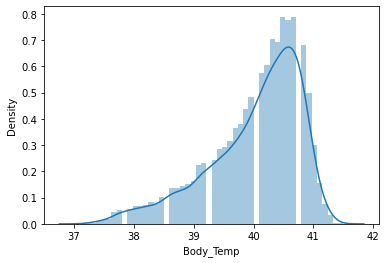

In [18]:
sns.distplot(combined_data['Body_Temp'])

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

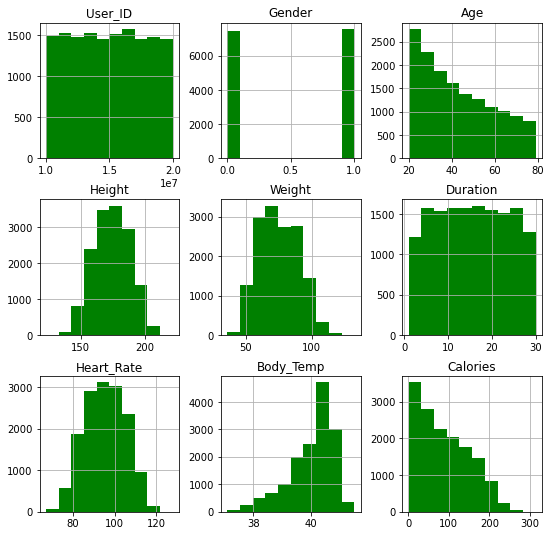

In [19]:
#Histogram
from matplotlib import pyplot
combined_data.hist(color = "green", figsize = (9,9))

User_ID          AxesSubplot(0.125,0.657941;0.227941x0.222059)
Gender        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Age           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Weight        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Duration      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Heart_Rate          AxesSubplot(0.125,0.125;0.227941x0.222059)
Body_Temp        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Calories         AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

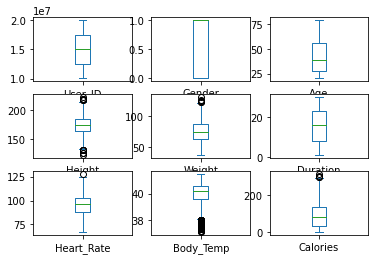

In [20]:
#Box plot
combined_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)


array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Calories', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Calories'>,
        <AxesSubplot:xlabel='Calories', ylabel='Calories'>]], dtype=object)

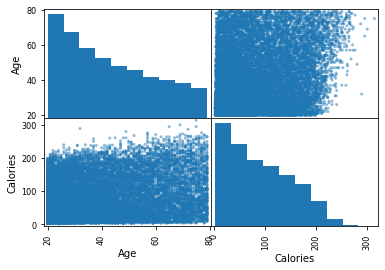

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(combined_data[['Age','Calories']])

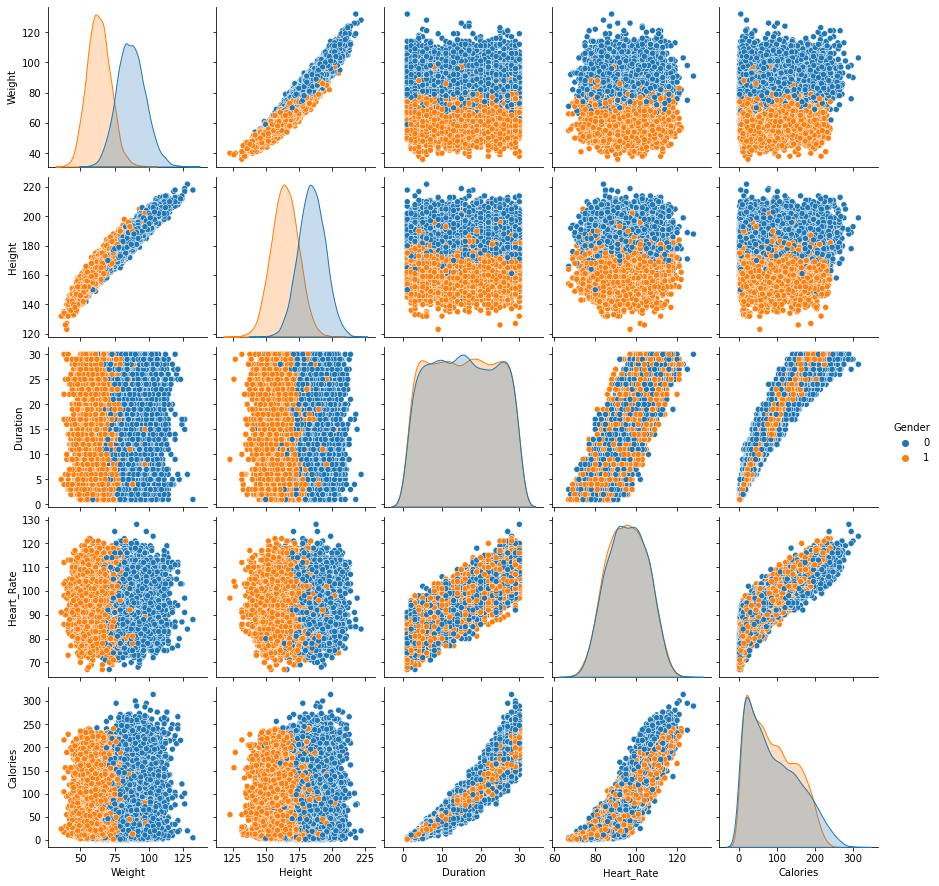

In [22]:
#pair plot
sns.pairplot(combined_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

<h2>To find the correlation in the data</h2>

In [23]:
correlation = combined_data.corr()

<AxesSubplot:>

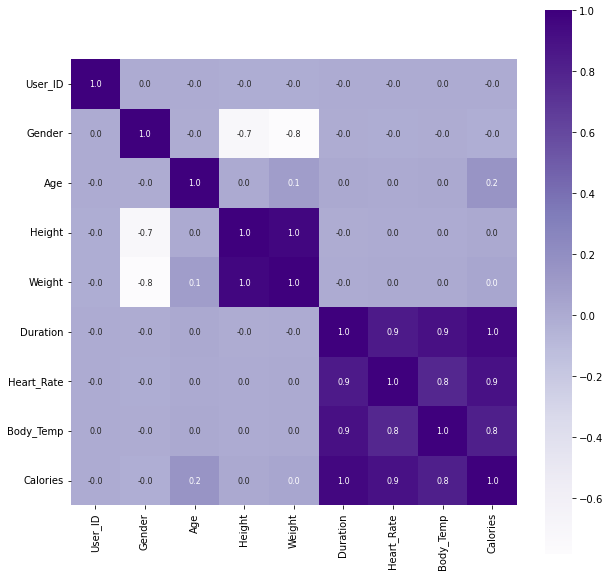

In [24]:
#Construction of heat map for the understanding of correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

<h2>Seperation of features and target</h2>

In [25]:
X=combined_data.drop(['User_ID','Calories'],axis=1)
Y=combined_data['Calories']

In [26]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190,94,29,105,40.8
1,1,20,166,60,14,94,40.3
2,0,69,179,79,5,88,38.7
3,1,34,179,71,13,100,40.5
4,1,27,154,58,10,81,39.8
...,...,...,...,...,...,...,...
14995,1,20,193,86,11,92,40.4
14996,1,27,165,65,6,85,39.2
14997,1,43,159,58,16,90,40.1
14998,0,78,193,97,2,84,38.3


In [27]:
Y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

<H2>Split the data into training and test data</h2>

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [30]:
print(X_train)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154        1   38     169      67         3          85       38.5
9804        0   30     194      96         9          91       39.6
7919        1   78     182      79         7          84       39.4
4854        0   50     171      77        29         111       40.8
5947        1   32     172      66        29         105       40.8
...       ...  ...     ...     ...       ...         ...        ...
11798       1   49     178      71        12          98       39.9
13896       1   67     159      58        23         101       40.4
6637        1   25     167      64        20         100       40.4
2575        1   36     167      64        28         108       40.8
7336        0   30     187      88        10          94       40.2

[12000 rows x 7 columns]


In [31]:
print(X_test)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
7592        1   41     172      74        24          98       40.8
3551        0   70     189      96        24         113       40.9
9698        1   53     173      68         7          96       39.3
3759        0   36     191      96         2          82       38.4
2353        1   46     169      68        20         111       40.6
...       ...  ...     ...     ...       ...         ...        ...
8859        1   20     161      60        29         107       40.3
2886        1   40     152      49        11          87       39.8
14357       1   57     160      62        23         103       40.2
9430        1   58     171      67         6          82       39.4
11870       1   62     175      70        17          94       40.3

[3000 rows x 7 columns]


In [32]:
print(Y_train)

1154      12.0
9804      37.0
7919      31.0
4854     222.0
5947     174.0
         ...  
11798     66.0
13896    145.0
6637     108.0
2575     180.0
7336      44.0
Name: Calories, Length: 12000, dtype: float64


In [33]:
print(Y_test)

7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64


<h2>Model implementation and Prediction</h2>

<h3>Using Linear Regression</h3>

In [34]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)
calories_burnt_prediction1 = model1.predict(X_test)
print(calories_burnt_prediction1)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


In [35]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(Y_test, calories_burnt_prediction1)
print(error1)

130.08707386188382


<h3>Using XGBregressor</h3>

In [36]:
model2 = XGBRegressor()
model2.fit(X_train,Y_train)
calories_burnt_prediction2 = model2.predict(X_test)

In [37]:
error2 = mean_squared_error(Y_test, calories_burnt_prediction2)
error2

4.53426242569831

<h3>Using KNN</h3>

In [38]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=13)
model3.fit(X_train,Y_train)
calories_burnt_prediction3 = model3.predict(X_test)
calories_burnt_prediction3

array([127.69230769, 236.46153846,  48.61538462, ..., 147.61538462,
        20.        ,  91.53846154])

In [39]:
error3 = mean_squared_error(Y_test, calories_burnt_prediction3)
error3

50.046676528599605

<h3>KNN for different values of K</h3>

<BarContainer object of 7 artists>

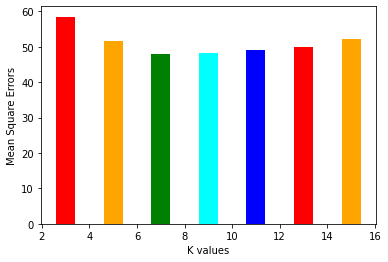

In [40]:
k_values = []
K_MSE = []
for k in range(3 , 16 , 2):
    k_values.append(k)
    model3 = KNeighborsRegressor(n_neighbors=k)
    model3.fit(X_train,Y_train)
    calories_burnt_prediction3 = model3.predict(X_test)
    error3 = mean_squared_error(Y_test, calories_burnt_prediction3)
    K_MSE.append(error3)
plt.xlabel("K values")
plt.ylabel("Mean Square Errors")
plt.bar(k_values , K_MSE , color=["red","orange","green" , "cyan" , "blue"])

<h3>Using SVM</h3>

In [41]:
from sklearn import svm 
model4 = svm.SVR(kernel = "linear")
model4.fit(X_train,Y_train)
calories_burnt_prediction4 = model4.predict(X_test)
calories_burnt_prediction4

array([136.1700646 , 174.1782753 ,  47.86380032, ..., 153.98868422,
        16.94868353,  98.32410435])

In [42]:
error4 = mean_squared_error(Y_test, calories_burnt_prediction4)
error4

140.2237614553197

<h3>Random forest Regressor</h3>

In [43]:
from sklearn.ensemble import RandomForestRegressor

# define used regressor
model5=RandomForestRegressor(n_estimators=20, max_depth=10, criterion='mse')

# train model
model5.fit(X_train,Y_train)


RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=20)

In [44]:
calories_burnt_prediction5 = model5.predict(X_test)
print(calories_burnt_prediction5)

[130.96711123 225.50357798  36.99760762 ... 145.36980373  24.30625379
  89.1926529 ]


In [45]:
error5 = mean_squared_error(Y_test, calories_burnt_prediction5)
print(error5)

13.159886509689713


<h3>Evaluating performance using mean square error</h3>

<BarContainer object of 5 artists>

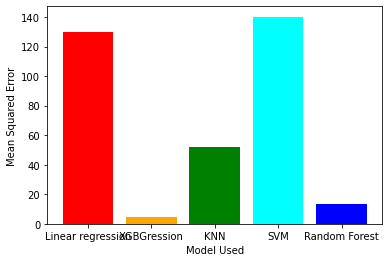

In [46]:
plt.xlabel("Model Used")
plt.ylabel("Mean Squared Error")
model_NAMES = ["Linear regression" , "XGBGression" , "KNN" , "SVM" , "Random Forest"]
errors = [error1 , error2 , error3 , error4 , error5]
plt.bar(model_NAMES , errors , color=["red","orange","green" , "cyan" , "blue"])

<h3>Evaluating performace using K Fold Cross Validation</h3>

LinearRegression()
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
KNeighborsRegressor(n_neighbors=15)
SVR(kernel='linear')
RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=20)
[0.967152984018283, 0.9988191272610507, 0.9867782376106866, 0.9649283062914815, 0.9964966751232274]


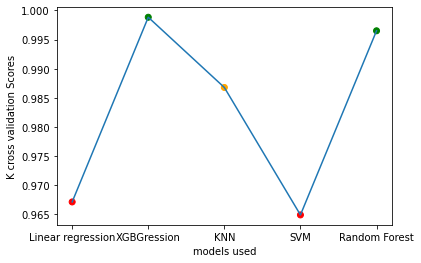

In [47]:
from sklearn.model_selection import KFold,cross_val_score
accuracy = []
models = [model1 , model2 , model3 , model4 , model5]
modelScores = []
for model in models:
    print(model)
    kfold_validation = KFold(5)
    ValidationResult = cross_val_score(model , X , Y , cv=kfold_validation)
    modelScores.append(np.mean(ValidationResult))
print(modelScores)
plt.ylabel("K cross validation Scores")
plt.xlabel("models used")
plt.plot(model_NAMES,modelScores)
plt.scatter(model_NAMES , modelScores , color = ['red' , 'green' , 'orange' , 'red' ,'green' ])